<a href="https://colab.research.google.com/github/jessica-guan/TRAIN-Notebooks/blob/main/Copy_of_TRAIN_YLC_Week_9_Homework_Notebook_%5BSTUDENT%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 9: K-Nearest Neighbors**
---

### **Description**
In this notebook, you will implement and evaluate KNN (K-Nearest Neighbors) models.

<br>

### **Structure**
**Part 1**: [Zoo Animal Classification Dataset](#p1)

**Part 2**: [Classifying Stars](#p2)




<br>

### **Learning Objectives**
By the end of this notebook, you will:
* Recognize how to implement KNN models with sklearn.
* Recognize how to change the K value for KNN models.

<br>

### **Resources**
* [K-Nearest Neighbors with sklearn](https://docs.google.com/document/d/1aoHhAOfbNAwc33yOQSRZbdt_qb69zb4kCpGiq8jsdec/edit?usp=sharing)

* [pandas Commands](https://docs.google.com/document/d/1qA9BtCj-TLAC31Itf7wx6qq8Is8QI2m0QJmxOKcbScc/edit?usp=drive_link)


* [Data Visualizations with matplotlib](https://docs.google.com/document/d/1FvZcR1kMLwIt142X-eGJghoIxpH7R2SGQuqgBsSfRQ8/edit?usp=drive_link)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection, metrics

<a name="p1"></a>

---
## **Part 1: Zoo Animal Classification Dataset**
---

#### **About the Dataset**
The following dataset contains information on various zoo animals, including their characteristics and classifications. Our goal is to build a model that predicts the classification of an animal based on its features.

<br>

The labels you will be trying to predict are as follows:

* `1` -- **Mammals** (41 animals in this category): aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, cat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby, wolf.
* `2` -- **Birds** (20 animals in this category): chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren.
* `3` -- **Reptiles** (5 animals in this category): pitviper, seasnake, slowworm, tortoise, tuatara.
* `4` -- **Fish** (13 animals in this category): bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna.
* `5` -- **Amphibians** (4 animals in this category): frog, frog, newt, toad.
* `6` -- **Insects** (8 animals in this category): flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp.
* `7` -- **Invertebrates** (10 animals in this category): clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm.

<br>

The features are as follows (all features marked with an * is 1 if yes and 0 if no):


* `animal_name`: Name of the animal
* `hair`: Hair presence*
* `feathers`: Feather presence*
* `eggs`: Egg-laying ability*
* `milk`: Milk production ability*
* `airborne`: Ability to fly*
* `aquatic`: Ability to live in water*
* `predator`: Predatory behavior*
* `toothed`: Teeth presence*
* `backbone`: Backbone presence*
*  `breathes`: Ability to breathe*
* `venomous`: Venom presence*
* `fins`: Fin presence*
* `legs`: Number of legs (0, 2, 4, 5, 6, or 8)
* `tail`: Tail presence*
* `domestic`: Domestication status*
* `catsize`: Cat-like size*
* `class_type`: Numeric class identifier (1-7) as described above

#### **Step #1: Load the data**

Use the following code to load the zoo animal classification dataset.

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"

# Create dataframe
column_names = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']
animals_df = pd.read_csv(url, names=column_names)
animals_df['class_type'] = animals_df['class_type'].map({1: 'mammal', 2: 'bird', 3: 'reptile', 4: 'fish', 5: 'amphibian', 6: 'insect', 7: 'invertebrate'})
animals_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammal


#### **Step #2: Decide independent and dependent variables**

Your goal is to predict `class_type` using all possible *numerical* features.


In [ ]:
features = animals_df.iloc[:, 1:-1]
label = animals_df['class_type']

#### **Step #3: Split data into training and testing data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

#### **Step #4: Import your model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from joblib import dump

#### **Step #5: Initialize your model and set hyperparameters**

Initialize the KNN model, and set hyperparameter `n_neighbors = 3`.

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)

#### **Step #6: Fit your model, test on the testing data**

**NOTE**: Visualization would be quite tricky here since there are 16 features instead of just 2. So, do not worry about doing this here.

In [ ]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

#### **Step #7: Evaluate your model**

Print the accuracy and confusion matrix for your model's performance on the test set.

<br>

**NOTE**: In this case, the labels are already the names of the classes as opposed to less meaningful numbers, so you do not need to supply a `display_labels` argument.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print("Accuracy Score: ", accuracy)

Accuracy Score:  0.9523809523809523


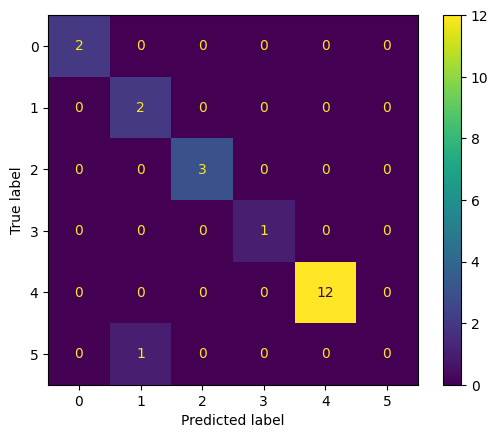

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()

<a name="p2"></a>

---
## **Part 2: Classifying Stars**
---
In this Part, we will use a dataset that contains data collected by astronomers about different classes of stars that have been observed. With KNN, you will use the size and temperature of stars to determine which class they may be from the following:

* `0`: Red Dwarf
* `1`: Brown Dwarf
* `2`: White Dwarf
* `3`: Main Sequence
* `4`: SuperGiants
* `5`: HyperGiants

#### **Step \#1: Load the data**

Run the given code to load and view your data frame.

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTCZgoegOHa49SFXYU-ZZTdCkgTp0sneU1BsEOa7vusjTXPPLcn0i3kXhX1nyqkApJHCKTkw0mWuWr4/pub?gid=753880827&single=true&output=csv'
stars_df = pd.read_csv(url)

stars_df.head()

,temperature,brightness,size,color,class
0,3068,0.002400,0.1700,Red,0
1,3042,0.000500,0.1542,Red,0
2,2600,0.000300,0.1020,Red,0
3,2800,0.000200,0.1600,Red,0
4,1939,0.000138,0.1030,Red,0


#### **Step \#2: Decide independent and dependent variables**

Use the dataframe `stars_df` and subset your data into `inputs` and `output`.

<br>

The `inputs` will be `size` and `temperature`.

The `output` will be `class`.

In [ ]:
features = stars_df[['size', 'temperature']]
target = stars_df['class']

#### **Step \#3: Split data into train and test data**

Let's split your data into training and testing data. Since this is a small dataset, let's just reserve 10% of the data for testing.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)

#### **Step \#4: Import your model**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from joblib import dump

#### **Step \#5: Initialize your model and set hyperparameters**

Build your model with $K=7$.

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7)

#### **Step \#6: Fit your model and make a prediction**

Train your model with the `x_train` and `y_train` training data and make predictions on `x_test`.

In [ ]:
knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test)

#### **Create a visualization**

**Run the code below to visualize the decision boundary of this KNN model.**


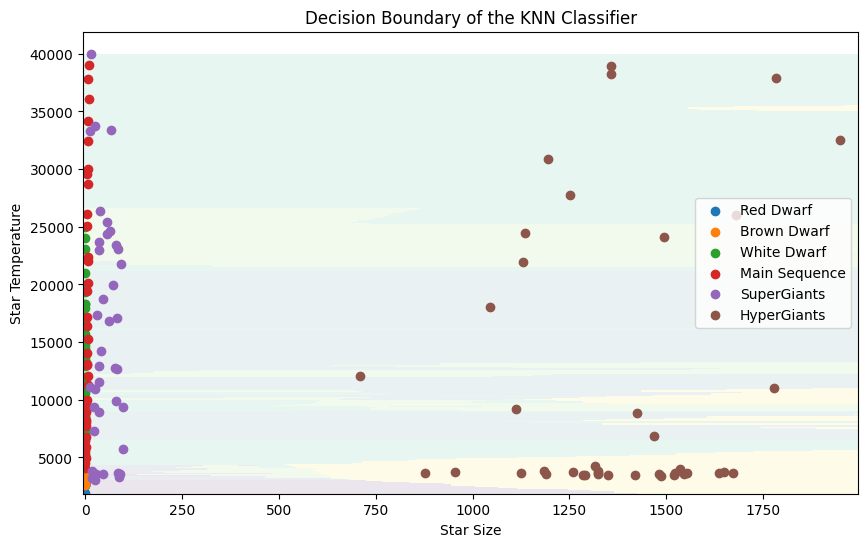

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(0, 2000, 10),
                     np.arange(1900, 40000, 100))
z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

labels = ['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'SuperGiants', 'HyperGiants']
for label, data in stars_df.groupby('class'):
  ax.scatter(data["size"], data["temperature"], label=labels[label])

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel("Star Size")
ax.set_ylabel("Star Temperature")
ax.legend()
plt.show()

#### **Step #7: Evaluate your model**

Print the accuracy and confusion matrix for your model's performance on the test set.

<br>

**NOTE**: It's not necessary to supply a `display_labels` argument, but if you are curious see if you can use the information provided in this Part to supply them.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print("Accuracy Score: ", accuracy)

Accuracy Score:  0.5


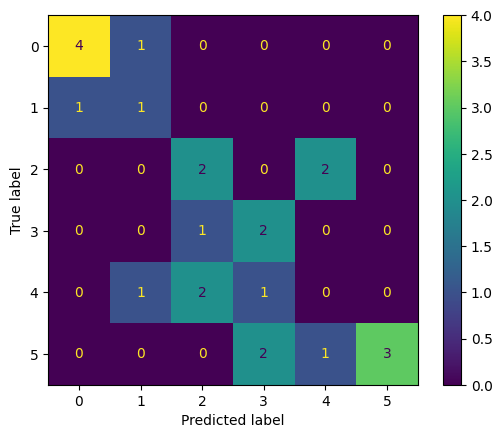

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()

#### **Step \#8: Make predictions**


Astronomers have heard of your amazing ML model for predicting star types and want you to help them categorize new stars they have observed! For each problem below, use your KNN model to classify the stars based on the data given to you.


1. `size`: 708.9, `temperature`: 12100 (`[708.9, 12100]`)

2. `size`: 0.0998, `temperature`:  3484 (`[0.0998, 3484]`)

3. `size`: 6.39, `temperature`:  34190 (`[6.39, 34190]`)

4. `size`: 0.16, `temperature`: 2799 (`[0.16, 2799]`)

In [ ]:
predicted_class = knn_model.predict([[708.9, 12100]])
predicted_class[0]

4

In [ ]:
predicted_class = knn_model.predict([[0.0998, 3484]])
predicted_class[0]

0

In [ ]:
predicted_class = knn_model.predict([[6.39, 34190]])
predicted_class[0]

3

In [ ]:
predicted_class = knn_model.predict([[0.16, 2799]])
predicted_class[0]

0

---

# End of Notebook

© 2023 The Coding School, All rights reserved